In [4]:
import numpy as np
import matplotlib.pyplot as plt
import openfermion as of
from openfermionpyscf import run_pyscf
import stim
from src.preprocessing.calc_clifford_transforms import clifford_transform_multiple_groups_to_zs
from src.preprocessing.commuting_groups import commuting_groups
from src.utils import qubitop_to_stim_pauli_strings

%load_ext scalene

The scalene extension is already loaded. To reload it, use:
  %reload_ext scalene


In [5]:
import itertools
def random_pauli_xs(n, num):
    vecs = np.random.choice([0, 1], size=(num, n))
    qops = [of.QubitOperator(' '.join([f'X{i}' for i in range(n) if vec[i]])) for vec in vecs]
    return qops

def all_pauli_xs(n):
    binary_arrays = list(itertools.product([0, 1], repeat=n))
    paulistrings = []
    for j, vec in enumerate(binary_arrays):
        ps = stim.PauliString(n)
        for i in range(n):
            if vec[i]:
                ps[i] = 1
        paulistrings.append(ps)
    return paulistrings

ns = list(range(5,15))
fillings = []
for n in ns:
    group_idxs = [np.arange(2**n)]
    operator_groups = [all_pauli_xs(n)]

    tableaus, pauli_idxs = clifford_transform_multiple_groups_to_zs(operator_groups, group_idxs, n)
    print(pauli_idxs)
    fillings.append(np.mean([len(idx) for idx in pauli_idxs]) / n)

plt.plot(ns, fillings)


[[0, 1, 2, 4, 8], [3, 5, 7, 9, 16], [6, 10, 11, 14, 17], [12, 13, 15, 18, 20], [19, 21, 22, 23, 24], [25, 26, 27, 28], [29, 30, 31]]
[[0, 1, 2, 4, 8, 16], [3, 5, 7, 9, 17, 32], [6, 10, 11, 14, 18, 33], [12, 13, 15, 19, 20, 34], [21, 22, 23, 24, 28, 35], [25, 26, 27, 29, 36, 40], [30, 31, 37, 38, 41, 44], [39, 42, 43, 45, 46, 48], [47, 49, 50, 51, 52, 56], [53, 54, 55, 57, 60], [58, 59, 61, 62], [63]]
[[0, 1, 2, 4, 8, 16, 32], [3, 5, 7, 9, 17, 33, 64], [6, 10, 11, 14, 18, 34, 65], [12, 13, 15, 19, 20, 35, 66], [21, 22, 23, 24, 28, 36, 67], [25, 26, 27, 29, 37, 40, 68], [30, 31, 38, 41, 42, 44, 69], [39, 43, 45, 46, 47, 48, 70], [49, 50, 51, 52, 56, 71, 80], [53, 54, 55, 57, 60, 72, 81], [58, 59, 61, 62, 73, 82, 88], [63, 74, 75, 76, 78, 83, 89], [77, 79, 84, 85, 90, 92, 96], [86, 87, 91, 93, 94, 97, 112], [95, 98, 99, 100, 102, 104, 113], [101, 103, 105, 106, 108, 114], [107, 109, 110, 111, 115, 120], [116, 117, 118, 121, 124], [119, 122, 123, 125, 126], [127]]
[[0, 1, 2, 4, 8, 16, 32, 

KeyboardInterrupt: 

Text(0, 0.5, 'filling')

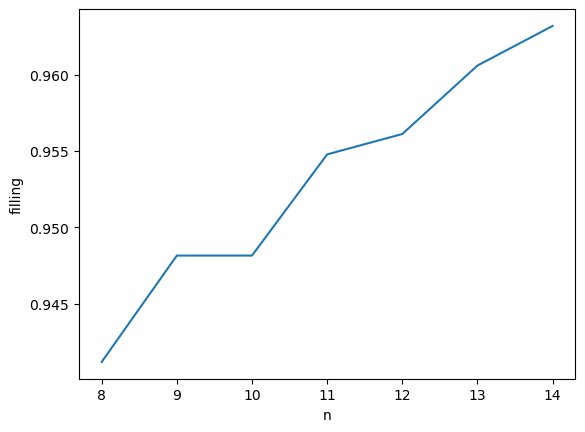

In [ ]:
plt.plot(ns[3:], fillings[3:])
plt.xlabel("n")
plt.ylabel("filling")

In [ ]:
import pandas as pd

data = {'ns': ns, 'fillings': fillings}
df = pd.DataFrame(data)
df.to_csv('data.csv', index=False)


SCALENE MAGIC
args=ScaleneArguments(cpu=True, gpu=True, memory=True, stacks=False, cpu_percent_threshold=1, cpu_sampling_rate=0.01, allocation_sampling_window=10485767, html=False, json=False, column_width=132, malloc_threshold=100, outfile=None, pid=0, profile_all=False, profile_interval=inf, profile_only='', profile_exclude='', program_path='', reduced_profile=False, use_virtual_time=False, memory_leak_detector=True, web=True, no_browser=False, port=8088, cli=False)
methane sto-3g
8480
18 8480
calculated operator groups


cell='# also get some filling factors for hamiltonians generated by openfermion\n# need a list of molecules to test with differing number of qubits\nfrom openfermion.chem import geometry_from_pubchem\nmolecule_names = ["molecular hydrogen", "lithium hydride", "water", "ammonia", "methane", "oxygen", "molecular nitrogen", "ethane", "disodium", \n                  # "XVOFZWCCFLVFRR-UHFFFAOYSA-N" # CrO oxochromium\n                  ]\nmolecule_names = ["methane"]\ngeometries = [geometry_from_pubchem(name) for name in molecule_names]\nmoleculeData = []\nfor i, geometry in enumerate(geometries):\n    basis = "sto-3g"\n    molecule = of.MolecularData(geometry, basis, 1)\n    mol = run_pyscf(molecule)\n    moleculeData.append((mol.n_qubits, mol, molecule_names[i], basis))\n# for i, geometry in enumerate(geometries[:-3]):\n#     basis = "6-31g"\n#     molecule = of.MolecularData(geometry, basis, 1)\n#     mol = run_pyscf(molecule)\n#     moleculeData.append((mol.n_qubits, mol, molecule_names[

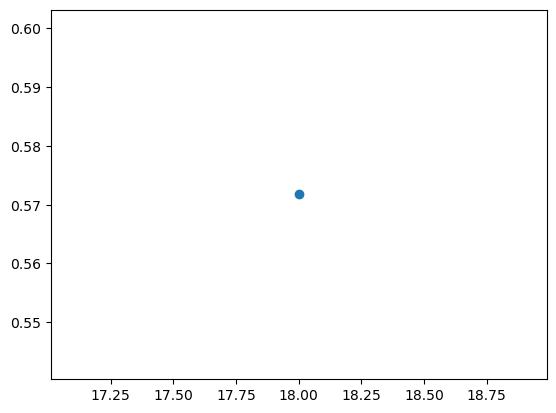

In [8]:
%%scalene
# also get some filling factors for hamiltonians generated by openfermion
# need a list of molecules to test with differing number of qubits
from openfermion.chem import geometry_from_pubchem
molecule_names = ["molecular hydrogen", "lithium hydride", "water", "ammonia", "methane", "oxygen", "molecular nitrogen", "ethane", "disodium", 
                  # "XVOFZWCCFLVFRR-UHFFFAOYSA-N" # CrO oxochromium
                  ]
molecule_names = ["methane"]
geometries = [geometry_from_pubchem(name) for name in molecule_names]
moleculeData = []
for i, geometry in enumerate(geometries):
    basis = "sto-3g"
    molecule = of.MolecularData(geometry, basis, 1)
    mol = run_pyscf(molecule)
    moleculeData.append((mol.n_qubits, mol, molecule_names[i], basis))
# for i, geometry in enumerate(geometries[:-3]):
#     basis = "6-31g"
#     molecule = of.MolecularData(geometry, basis, 1)
#     mol = run_pyscf(molecule)
#     moleculeData.append((mol.n_qubits, mol, molecule_names[i], basis))

hamiltonianData = []
for md in moleculeData:
    print(md[2], md[3])
    ham = of.transforms.jordan_wigner(of.transforms.get_fermion_operator(md[1].get_molecular_hamiltonian()))
    print(len(ham.terms))
    hamiltonianData.append((md[0], len(ham.terms) ,  ham, md[2], md[3]))
hamiltonianData = sorted(hamiltonianData, key=lambda x: x[1])

hamiltonians = [hd[2] for hd in hamiltonianData]
ns = [hd[0] for hd in hamiltonianData]
fillings = []
for i, hamiltonian in enumerate(hamiltonians):
    n = ns[i]
    print(n, len(hamiltonian.terms))
    operator_groups, group_idxs = commuting_groups(hamiltonian, n)
    print("calculated operator groups")
    tableaus, pauli_idxs = clifford_transform_multiple_groups_to_zs(operator_groups, group_idxs, n)
    fillings.append(np.mean([len(idx) for idx in pauli_idxs]) / n)

plt.scatter(ns, fillings)